In [ ]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train=pd.read_csv("trainloan.csv")
test=pd.read_csv("testloan.csv")

In [ ]:
# Copy of original data
train_original=train.copy()
test_original=test.copy()

# Features in the dataset
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [ ]:
# Print data types for each variable
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Shape of the dataset
train.shape, test.shape

((614, 13), (367, 12))

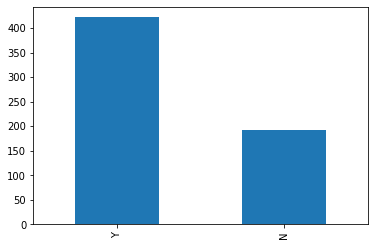

In [ ]:
train['Loan_Status'].value_counts(normalize=True)
train['Loan_Status'].value_counts().plot.bar()

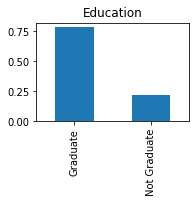

In [ ]:
# Visualizing categorical features
plt.figure(1)
plt.subplot(221)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')
plt.show()

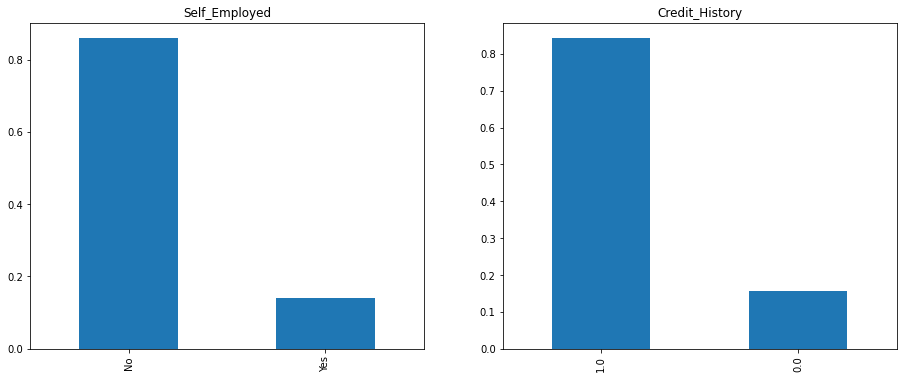

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Self_Employed')

plt.subplot(132)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


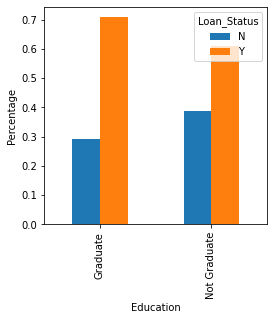

In [ ]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

In [ ]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

x = train.drop('Loan_Status',1)
y = train.Loan_Status    

x=pd.get_dummies(x)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(x,y, test_size=0.3, random_state=123)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

pred_cv=LR.predict(x_cv)
accuracy_score(y_cv,pred_cv